tensor 생성 예시

In [1]:
import torch
print(torch.tensor([[1,2],[3,4]]))
##print(torch.tensor([[1,2],[3,4]],device="cuda:0"))  available on local gpu machine
print(torch.tensor([[1,2],[3,4]],dtype=torch.float64))

tensor([[1, 2],
        [3, 4]])
tensor([[1., 2.],
        [3., 4.]], dtype=torch.float64)


In [2]:
import numpy
temp = torch.tensor([[1,2],[3,4]])
print(temp.numpy())

[[1 2]
 [3 4]]


In [11]:
v = torch.tensor([1,2,3])
w = torch.tensor([3,4,6])
print(w-v)

tensor([2, 2, 3])


In [12]:
temp = torch.tensor([[1,2],[3,4]])
print(temp.shape)
print(temp.view(4,1))
print(temp.view(-1))
print(temp.view(1,-1))
print(temp.view(-1,1))

torch.Size([2, 2])
tensor([[1],
        [2],
        [3],
        [4]])
tensor([1, 2, 3, 4])
tensor([[1, 2, 3, 4]])
tensor([[1],
        [2],
        [3],
        [4]])


In [16]:
model = torch.nn.Linear(in_features=1,out_features=1,bias=True)
print(model)

Linear(in_features=1, out_features=1, bias=True)


In [17]:
import torch.nn as nn
class MLP(nn.Module):
  def __init__(self,inputs):
    super(MLP,self).__init__()
    self.layer=nn.Linear(inputs,1)
    self.activation=nn.Sigmoid()
  def forward(self,X):
    X=self.layer(X)
    X=self.activation(X)
    return X

In [18]:
class MLP(nn.Module):
  def __init__(self):
    super(MLP,self).__init__()
    self.layer1 = nn.Sequential(
        nn.Conv2d(in_channels=3,out_channels=64,kernel_size=5),
        nn.ReLU(inplace=True),
        nn.MaxPool2d(2))
    self.layer2 = nn.Sequential(
        nn.Conv2d(in_channels=64,out_channels=30,kernel_size=5),
        nn.ReLU(inplace=True),
        nn.MaxPool2d(2))
    self.layer3 = nn.Sequential(
        nn.Linear(in_features=30*5*5,out_features=10,bias=True),
        nn.ReLU(inplace=True))
  def forward(self,x):
    x=self.layer1(x)
    x=self.layer2(x)
    x=x.view(x.shape[0],-1)
    x=self.layer3(x)
    return x
model = MLP()
print(list(model.children()))
print(list(model.modules()))

[Sequential(
  (0): Conv2d(3, 64, kernel_size=(5, 5), stride=(1, 1))
  (1): ReLU(inplace=True)
  (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
), Sequential(
  (0): Conv2d(64, 30, kernel_size=(5, 5), stride=(1, 1))
  (1): ReLU(inplace=True)
  (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
), Sequential(
  (0): Linear(in_features=750, out_features=10, bias=True)
  (1): ReLU(inplace=True)
)]
[MLP(
  (layer1): Sequential(
    (0): Conv2d(3, 64, kernel_size=(5, 5), stride=(1, 1))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (layer2): Sequential(
    (0): Conv2d(64, 30, kernel_size=(5, 5), stride=(1, 1))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (layer3): Sequential(
    (0): Linear(in_features=750, out_features=10, bias=True)
    (1): ReLU(inplace=True)
  )
), Sequential(
  (0)

In [3]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [6]:
import torch
import torch.nn as nn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#import seaborn as sns
%matplotlib inline
#dataset = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/dl_pytorch/chap02/data/car_evaluation.csv')
dataset = pd.read_csv('./dl_pytorch/chap02/data/car_evaluation.csv')
dataset.head()

,price,maint,doors,persons,lug_capacity,safety,output
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


<AxesSubplot:ylabel='output'>

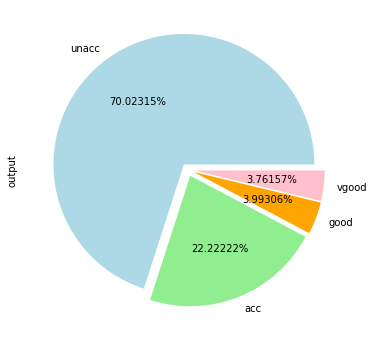

In [7]:
fig_size = plt.rcParams["figure.figsize"]
fig_size[0]=8
fig_size[1]=6
plt.rcParams["figure.figsize"]=fig_size
dataset.output.value_counts().plot(kind='pie',autopct='%0.05f%%',colors=['lightblue','lightgreen','orange','pink'],explode=(0.05,0.05,0.05,0.05))

In [8]:
categorical_columns = ['price','maint','doors','persons','lug_capacity','safety']
for category in categorical_columns:
  dataset[category] = dataset[category].astype('category') #astype 이용해서 categorical datatype으로 변환
price= dataset['price'].cat.codes.values
maint= dataset['maint'].cat.codes.values
doors= dataset['doors'].cat.codes.values
persons= dataset['persons'].cat.codes.values
lug_capacity= dataset['lug_capacity'].cat.codes.values
safety= dataset['safety'].cat.codes.values

categorical_data = np.stack([price,maint,doors,persons,lug_capacity,safety],1)
categorical_data[:10]

array([[3, 3, 0, 0, 2, 1],
       [3, 3, 0, 0, 2, 2],
       [3, 3, 0, 0, 2, 0],
       [3, 3, 0, 0, 1, 1],
       [3, 3, 0, 0, 1, 2],
       [3, 3, 0, 0, 1, 0],
       [3, 3, 0, 0, 0, 1],
       [3, 3, 0, 0, 0, 2],
       [3, 3, 0, 0, 0, 0],
       [3, 3, 0, 1, 2, 1]], dtype=int8)

In [10]:
categorical_data = torch.tensor(categorical_data,dtype=torch.int64)
categorical_data[:10]

C:\Users\user\AppData\Local\Temp\ipykernel_9856\4246351941.py:1: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  categorical_data = torch.tensor(categorical_data,dtype=torch.int64)


tensor([[3, 3, 0, 0, 2, 1],
        [3, 3, 0, 0, 2, 2],
        [3, 3, 0, 0, 2, 0],
        [3, 3, 0, 0, 1, 1],
        [3, 3, 0, 0, 1, 2],
        [3, 3, 0, 0, 1, 0],
        [3, 3, 0, 0, 0, 1],
        [3, 3, 0, 0, 0, 2],
        [3, 3, 0, 0, 0, 0],
        [3, 3, 0, 1, 2, 1]])

In [11]:
outputs=pd.get_dummies(dataset.output)
outputs=outputs.values
outputs=torch.tensor(outputs).flatten()
print(categorical_data.shape)
print(outputs.shape)

torch.Size([1728, 6])
torch.Size([6912])


In [12]:
categorical_column_sizes =[len(dataset[column].cat.categories) for column in categorical_columns]
categorical_embedding_sizes=[(col_size,min(50,(col_size+1)//2)) for col_size in categorical_column_sizes]
print(categorical_embedding_sizes)

[(4, 2), (4, 2), (4, 2), (3, 2), (3, 2), (3, 2)]


In [13]:
total_records = 1728
test_records = int(total_records*.2)

categorical_train_data = categorical_data[:total_records-test_records]
categorical_test_data = categorical_data[total_records-test_records:total_records]
train_outputs=outputs[:total_records-test_records]
test_outputs=outputs[total_records-test_records:total_records]
print(len(categorical_train_data))
print(len(categorical_test_data))
print(len(train_outputs))
print(len(test_outputs))

1383
345
1383
345


In [ ]:
네트워크 생성

In [14]:
class Model(nn.Module):
  def __init__(self,embedding_size,output_size,layers,p=0.4):
    super().__init__()
    self.all_embeddings=nn.ModuleList([nn.Embedding(ni,nf) for ni,nf in embedding_size])
    self.embedding_dropout = nn.Dropout(p)

    all_layers=[]
    num_categorical_cols = sum((nf for ni,nf in embedding_size))
    input_size = num_categorical_cols

    for i in layers:
      all_layers.append(nn.Linear(input_size,i))
      all_layers.append(nn.ReLU(inplace=True))
      all_layers.append(nn.BatchNorm1d(i))
      all_layers.append(nn.Dropout(p))
      input_size = i
    
    all_layers.append(nn.Linear(layers[-1],output_size))
    self.layers = nn.Sequential(*all_layers)
  def forward(self,x_categorical):
    embeddings = []
    for i,e in enumerate(self.all_embeddings):
      embeddings.append(e(x_categorical[:,i]))
      x=torch.cat(embeddings,1)
      x=self.embedding_dropout(x)
      x=self.layers(x)
      return x
    

In [15]:
model = Model(categorical_embedding_sizes,4,[100,75,50],p=0.4)
print(model)

Model(
  (all_embeddings): ModuleList(
    (0): Embedding(4, 2)
    (1): Embedding(4, 2)
    (2): Embedding(4, 2)
    (3): Embedding(3, 2)
    (4): Embedding(3, 2)
    (5): Embedding(3, 2)
  )
  (embedding_dropout): Dropout(p=0.4, inplace=False)
  (layers): Sequential(
    (0): Linear(in_features=12, out_features=100, bias=True)
    (1): ReLU(inplace=True)
    (2): BatchNorm1d(100, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): Dropout(p=0.4, inplace=False)
    (4): Linear(in_features=100, out_features=75, bias=True)
    (5): ReLU(inplace=True)
    (6): BatchNorm1d(75, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (7): Dropout(p=0.4, inplace=False)
    (8): Linear(in_features=75, out_features=50, bias=True)
    (9): ReLU(inplace=True)
    (10): BatchNorm1d(50, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (11): Dropout(p=0.4, inplace=False)
    (12): Linear(in_features=50, out_features=4, bias=True)
  )
)


In [16]:
loss_fn=nn.CrossEntropyLoss()
optimizer=torch.optim.Adam(model.parameters(),lr=0.001)

if torch.cuda.is_available():
  device = torch.device('cuda')
else:
  device = torch.device('cpu')

In [17]:
epochs=500
aggregated_losses=[]
train_outputs = train_outputs.to(device=device,dtype=torch.int64)
for i in range(epochs):
  i+=1
  y_pred = model(categorical_train_data)
  single_loss=loss_fn(y_pred,train_outputs)
  aggregated_losses.append(single_loss)

  if i%25==1:
    print(f'epoch:{i:3} loss:{single_loss.item():10.8f}')
  
  optimizer.zero_grad()
  single_loss.backward()
  optimizer.step()

RuntimeError: mat1 and mat2 shapes cannot be multiplied (1383x2 and 12x100)

In [94]:
test_outputs = test_outputs.to(device=device,dtype=torch.int64)
with torch.no_grad():
  y_val = model(categorical_test_data)
  loss = loss_fn(y_val,test_outputs)
print(f'Loss:{loss:.8f}')

RuntimeError: ignored